In [33]:
import matplotlib.pyplot as plt #plotting and data visualization
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2 
#pip install opencv-python

In [34]:
"""Helper function to plot a gallery of portraits"""
def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [35]:
dir_name="dataset/faces/"

y=[]
X=[]
target_names=[]
person_id=0
h=w=300
n_samples=0
class_names=[]

for person_name in os.listdir(dir_name):
    # print(person_name)
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # formulate the image path
        image_path = os.path.join(dir_path, image_name)
        # Read the input image
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize image to 300*300 dimension
        resized_image= cv2.resize(gray, (h,w))
        # convert matrix to vector
        X.append(resized_image.flatten())
        # increase the number of samples
        # n_samples =n_samples+1
        # Adding to categorical label
        y.append(person_id)
        # adding the person name
        target_names.append(person_name)
        # Increase the person id by 1
    person_id=person_id+1
# transform List to numpy array
X=np.array(X)
y=np.array(y)
target_names =np.array(target_names)
n_samples,n_features= X.shape
n_classes=target_names.shape[0]

print("Number of samples:",n_samples)
print("Number of features:",n_features)


print("Total dataset size:")

print("n_samples: %d" % n_samples)

print("n_features: %d" % n_features)

print("n_classes: %d" % n_classes)

Number of samples: 450
Number of features: 90000
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 315 faces


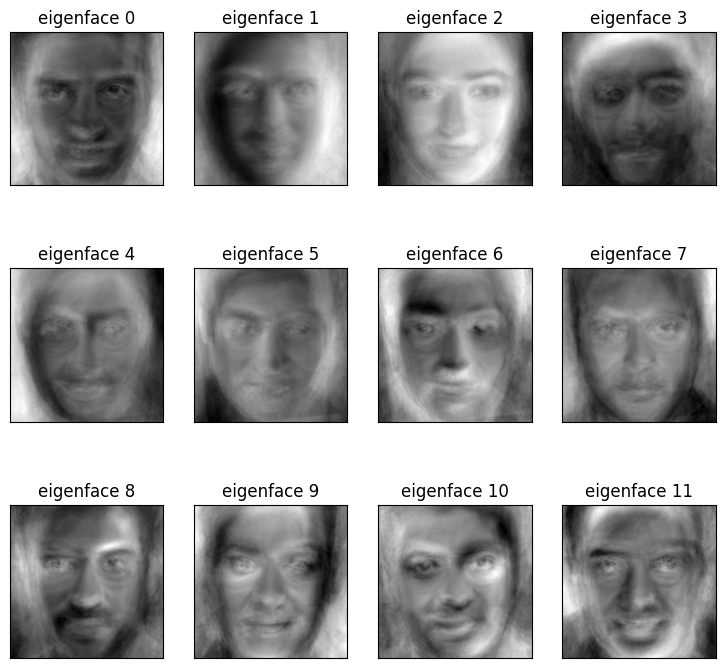

Projecting the input data on the eigenfaces orthonormal basis
(315, 150) (135, 150)
Project done...


In [40]:
# Split into a training set and a test set asing a stratified k fold

# split into a training and testing set

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.3, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset (treated as untabel ed #dataset): unsupervised feature extraction/dimensionality reduction 
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Applying PCA
pca=PCA(n_components=n_components,svd_solver='randomized', whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces= pca.components_.reshape((n_components, h, w))

#plot the gallery of the most significative eigenfaces
eigenface_titles=["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print(X_train_pca.shape,X_test_pca.shape)

# Compute Fisherfaces
lda=LinearDiscriminantAnalysis()

#Compute LDA of reduced data

lda.fit(X_train_pca, y_train)

X_train_lda= lda.transform(X_train_pca)

X_test_lda= lda.transform(X_test_pca)

lda.transform(X_train_pca)

print("Project done...")


In [41]:
# Training with Multi Layer perceptron

clf=MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)

print("Model Weights:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.45648798
Iteration 2, loss = 3.38750645
Iteration 3, loss = 3.32532714
Iteration 4, loss = 3.25867461
Iteration 5, loss = 3.20064185
Iteration 6, loss = 3.14377124
Iteration 7, loss = 3.08735933
Iteration 8, loss = 3.03384648
Iteration 9, loss = 2.98188243
Iteration 10, loss = 2.93070507
Iteration 11, loss = 2.87972004
Iteration 12, loss = 2.83163510
Iteration 13, loss = 2.78656491
Iteration 14, loss = 2.74253022
Iteration 15, loss = 2.69982023
Iteration 16, loss = 2.65762967
Iteration 17, loss = 2.61733401
Iteration 18, loss = 2.57826851
Iteration 19, loss = 2.54057935
Iteration 20, loss = 2.50305464
Iteration 21, loss = 2.46788023
Iteration 22, loss = 2.43215497
Iteration 23, loss = 2.39834684
Iteration 24, loss = 2.36588900
Iteration 25, loss = 2.33204937
Iteration 26, loss = 2.30092103
Iteration 27, loss = 2.27094864
Iteration 28, loss = 2.24129100
Iteration 29, loss = 2.21046770
Iteration 30, loss = 2.18328810
Iteration 31, loss = 2.15414505
Iteration 32, los

Iteration 1, loss = 2.57691793
Iteration 2, loss = 2.55960137
Iteration 3, loss = 2.54273239
Iteration 4, loss = 2.52708598
Iteration 5, loss = 2.51140812
Iteration 6, loss = 2.49612156
Iteration 7, loss = 2.48155860
Iteration 8, loss = 2.46696739
Iteration 9, loss = 2.45391011
Iteration 10, loss = 2.44006439
Iteration 11, loss = 2.42737451
Iteration 12, loss = 2.41456930
Iteration 13, loss = 2.40280308
Iteration 14, loss = 2.39063604
Iteration 15, loss = 2.37901895
Iteration 16, loss = 2.36809234
Iteration 17, loss = 2.35772204
Iteration 18, loss = 2.34740332
Iteration 19, loss = 2.33757663
Iteration 20, loss = 2.32747181
Iteration 21, loss = 2.31831840
Iteration 22, loss = 2.30924320
Iteration 23, loss = 2.30032933
Iteration 24, loss = 2.29182538
Iteration 25, loss = 2.28348277
Iteration 26, loss = 2.27528723
Iteration 27, loss = 2.26750331
Iteration 28, loss = 2.25979126
Iteration 29, loss = 2.25223992
Iteration 30, loss = 2.24468566
Iteration 31, loss = 2.23766628
Iteration 32, los

c:\Users\dubey\OneDrive\Desktop\Coding\Projects\Face Recognition\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.78190533
Iteration 2, loss = 2.75543393
Iteration 3, loss = 2.72885128
Iteration 4, loss = 2.70443514
Iteration 5, loss = 2.68062228
Iteration 6, loss = 2.65725479
Iteration 7, loss = 2.63551262
Iteration 8, loss = 2.61410899
Iteration 9, loss = 2.59393295
Iteration 10, loss = 2.57418586
Iteration 11, loss = 2.55656551
Iteration 12, loss = 2.53924367
Iteration 13, loss = 2.52159880
Iteration 14, loss = 2.50590258
Iteration 15, loss = 2.49016554
Iteration 16, loss = 2.47541761
Iteration 17, loss = 2.46163725
Iteration 18, loss = 2.44768163
Iteration 19, loss = 2.43497542
Iteration 20, loss = 2.42211907
Iteration 21, loss = 2.41036042
Iteration 22, loss = 2.39882978
Iteration 23, loss = 2.38729104
Iteration 24, loss = 2.37691426
Iteration 25, loss = 2.36680016
Iteration 26, loss = 2.35661830
Iteration 27, loss = 2.34738843
Iteration 28, loss = 2.33806348
Iteration 29, loss = 2.32971124
Iteration 30, loss = 2.32075746
Iteration 31, loss = 2.31236848
Iteration 32, los

c:\Users\dubey\OneDrive\Desktop\Coding\Projects\Face Recognition\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.48198088
Iteration 2, loss = 2.46099750
Iteration 3, loss = 2.44192369
Iteration 4, loss = 2.42393944
Iteration 5, loss = 2.40627136
Iteration 6, loss = 2.38980393
Iteration 7, loss = 2.37399966
Iteration 8, loss = 2.35982474
Iteration 9, loss = 2.34549888
Iteration 10, loss = 2.33213028
Iteration 11, loss = 2.31918592
Iteration 12, loss = 2.30749915
Iteration 13, loss = 2.29594972
Iteration 14, loss = 2.28501173
Iteration 15, loss = 2.27413935
Iteration 16, loss = 2.26407755
Iteration 17, loss = 2.25427569
Iteration 18, loss = 2.24499218
Iteration 19, loss = 2.23598078
Iteration 20, loss = 2.22716105
Iteration 21, loss = 2.21933431
Iteration 22, loss = 2.21115440
Iteration 23, loss = 2.20333701
Iteration 24, loss = 2.19568228
Iteration 25, loss = 2.18830811
Iteration 26, loss = 2.18130963
Iteration 27, loss = 2.17428621
Iteration 28, loss = 2.16752381
Iteration 29, loss = 2.16085057
Iteration 30, loss = 2.15441490
Iteration 31, loss = 2.14809110
Iteration 32, los

c:\Users\dubey\OneDrive\Desktop\Coding\Projects\Face Recognition\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.51331795
Iteration 2, loss = 2.49437815
Iteration 3, loss = 2.47861258
Iteration 4, loss = 2.46165659
Iteration 5, loss = 2.44588528
Iteration 6, loss = 2.43185293
Iteration 7, loss = 2.41744409
Iteration 8, loss = 2.40290369
Iteration 9, loss = 2.39011205
Iteration 10, loss = 2.37779569
Iteration 11, loss = 2.36569060
Iteration 12, loss = 2.35395437
Iteration 13, loss = 2.34248110
Iteration 14, loss = 2.33152467
Iteration 15, loss = 2.32127385
Iteration 16, loss = 2.31103778
Iteration 17, loss = 2.30045127
Iteration 18, loss = 2.29125312
Iteration 19, loss = 2.28192691
Iteration 20, loss = 2.27282095
Iteration 21, loss = 2.26437953
Iteration 22, loss = 2.25602932
Iteration 23, loss = 2.24773710
Iteration 24, loss = 2.23954869
Iteration 25, loss = 2.23166697
Iteration 26, loss = 2.22404343
Iteration 27, loss = 2.21630261
Iteration 28, loss = 2.20899864
Iteration 29, loss = 2.20190449
Iteration 30, loss = 2.19486591
Iteration 31, loss = 2.18814853
Iteration 32, los

c:\Users\dubey\OneDrive\Desktop\Coding\Projects\Face Recognition\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.41810607
Iteration 2, loss = 2.39960185
Iteration 3, loss = 2.38236589
Iteration 4, loss = 2.36608991
Iteration 5, loss = 2.34991210
Iteration 6, loss = 2.33438458
Iteration 7, loss = 2.32061830
Iteration 8, loss = 2.30604493
Iteration 9, loss = 2.29307001
Iteration 10, loss = 2.28024075
Iteration 11, loss = 2.26808986
Iteration 12, loss = 2.25660555
Iteration 13, loss = 2.24510106
Iteration 14, loss = 2.23446778
Iteration 15, loss = 2.22390017
Iteration 16, loss = 2.21439889
Iteration 17, loss = 2.20424584
Iteration 18, loss = 2.19488148
Iteration 19, loss = 2.18609559
Iteration 20, loss = 2.17712440
Iteration 21, loss = 2.16882361
Iteration 22, loss = 2.16047311
Iteration 23, loss = 2.15232921
Iteration 24, loss = 2.14458598
Iteration 25, loss = 2.13686772
Iteration 26, loss = 2.12929283
Iteration 27, loss = 2.12184630
Iteration 28, loss = 2.11440820
Iteration 29, loss = 2.10739204
Iteration 30, loss = 2.10020085
Iteration 31, loss = 2.09314673
Iteration 32, los

c:\Users\dubey\OneDrive\Desktop\Coding\Projects\Face Recognition\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.40793468
Iteration 2, loss = 2.38902034
Iteration 3, loss = 2.37137101
Iteration 4, loss = 2.35553507
Iteration 5, loss = 2.33896188
Iteration 6, loss = 2.32412245
Iteration 7, loss = 2.30975936
Iteration 8, loss = 2.29649951
Iteration 9, loss = 2.28374651
Iteration 10, loss = 2.27117752
Iteration 11, loss = 2.25957800
Iteration 12, loss = 2.24836509
Iteration 13, loss = 2.23752718
Iteration 14, loss = 2.22657286
Iteration 15, loss = 2.21638690
Iteration 16, loss = 2.20677797
Iteration 17, loss = 2.19727366
Iteration 18, loss = 2.18787953
Iteration 19, loss = 2.17874892
Iteration 20, loss = 2.16982661
Iteration 21, loss = 2.16118985
Iteration 22, loss = 2.15276337
Iteration 23, loss = 2.14453715
Iteration 24, loss = 2.13671423
Iteration 25, loss = 2.12889337
Iteration 26, loss = 2.12110289
Iteration 27, loss = 2.11308336
Iteration 28, loss = 2.10573285
Iteration 29, loss = 2.09817008
Iteration 30, loss = 2.09051262
Iteration 31, loss = 2.08289784
Iteration 32, los

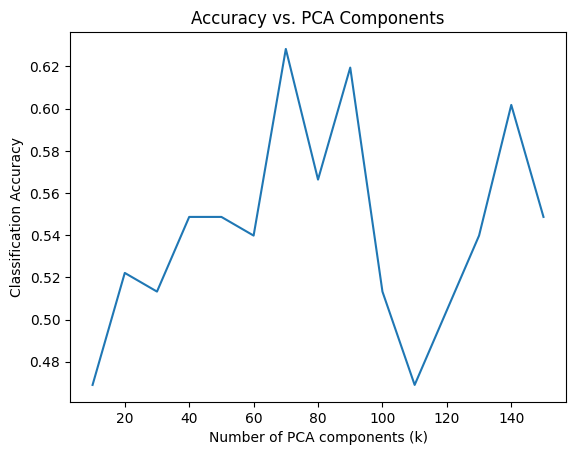

In [32]:
accuracies = []
k_values = range(10, 160, 10)
for k in k_values:
    pca = PCA(n_components=k, svd_solver='randomized', whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)
plt.plot(k_values, accuracies)
plt.xlabel("Number of PCA components (k)")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs. PCA Components")
plt.show()


Accuracy: 68.14814814814815


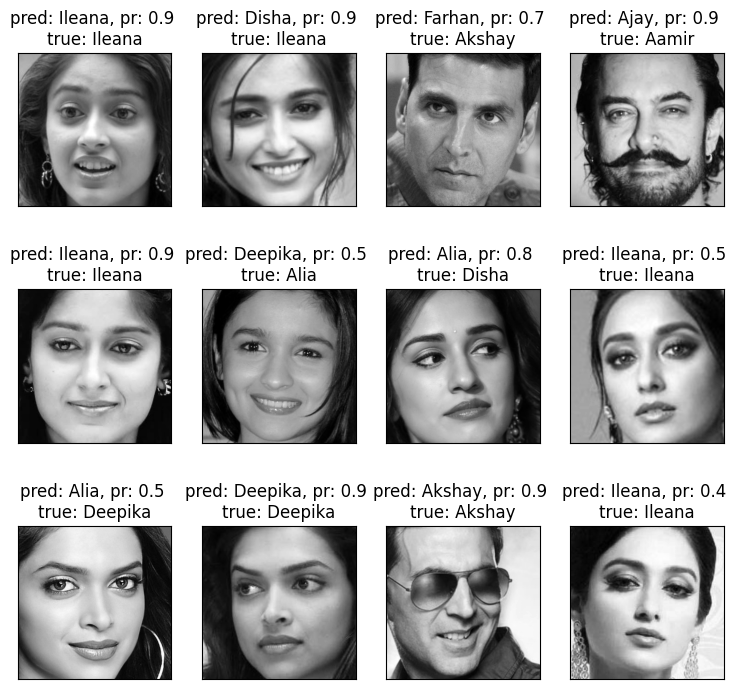

In [42]:
y_pred=[]
y_prob=[]
for test_face in X_test_lda:
    prob =clf.predict_proba([test_face])[0]
    class_id= np.where(prob == np.max(prob))[0][0]
    #Find the Label of the mathed face

    y_pred.append(class_id)
    y_prob.append(np.max(prob))

#Transform the data

y_pred=np.array(y_pred)

prediction_titles=[]

true_positive = 0

for i in range(y_pred.shape[0]):

    true_name= class_names[y_test[i]]

    pred_name = class_names[y_pred[i]]

    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i]) [0:3], true_name)

    #result 'prediction: %s \ntrue: %s' % (pred name, true name)
    prediction_titles.append(result)

    if true_name==pred_name:
        true_positive =true_positive+1

print("Accuracy:", true_positive*100/y_pred.shape[0])

##Plot results

plot_gallery(X_test, prediction_titles, h, w)

plt.show()